<a href="https://colab.research.google.com/github/PaulinaJohn/House_Prices_Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### __Introduction__

This project is aimed at building a model that can predict the saleprice of a house using a number of features about the house.
The data description, as provided in a file called data_description.txt has been added to this notebook and can be found in the last cell in the notebook.

Find the dataset and description file through this [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)


People on this project:

* [Paulina John](https://github.com/PaulinaJohn)
* [Serah Akojenu](https://github.com/akojenuserah)
* Tirzah Commey

#### __Goal and Metric__

Image Source: The page for this competition on kaggle

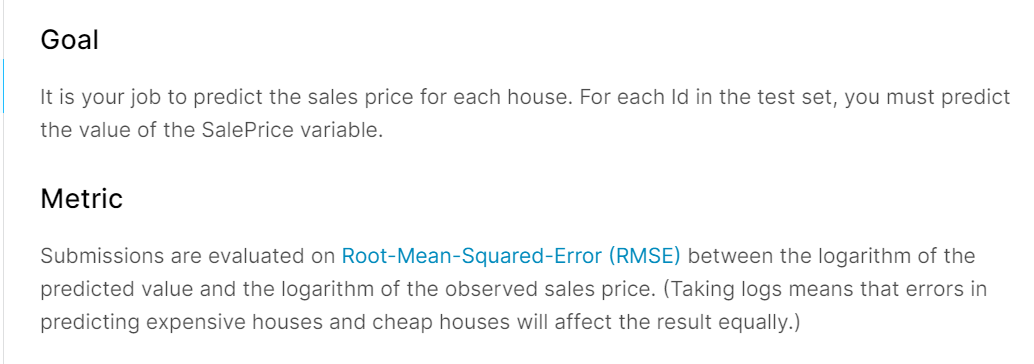

####__Baseline Submissions__



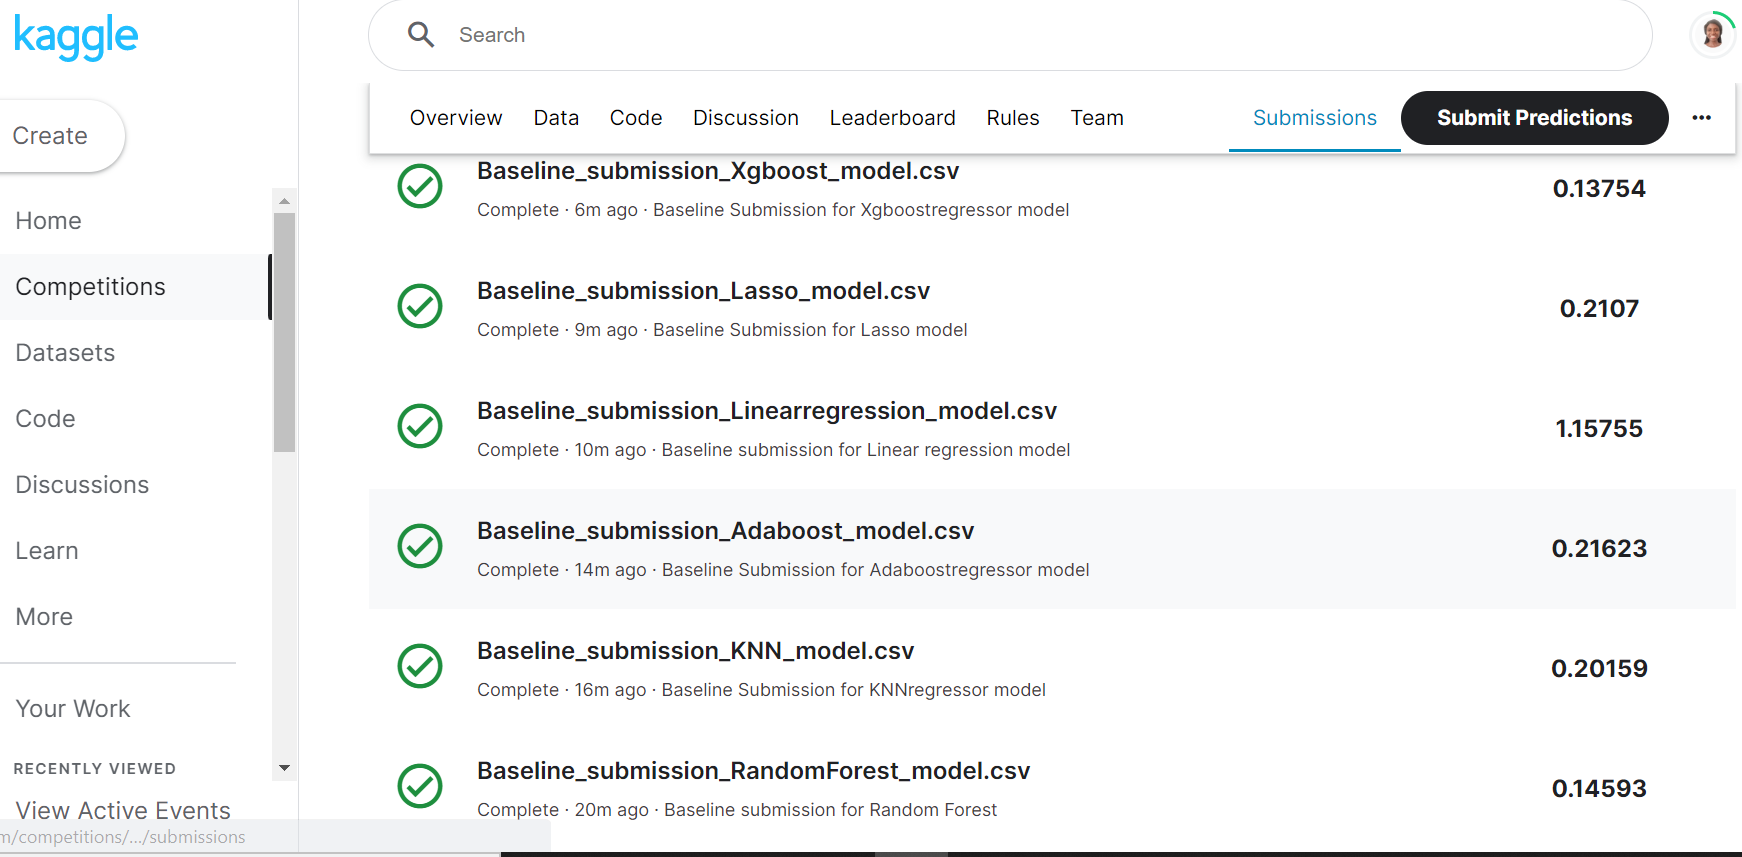

### __Importing dependencies__

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,6)})
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None) # To display all the columns in the datasets.
pd.pandas.set_option('display.max_rows', None) # To display all the rows in the datasets.
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

### __Loading in the train and test data__

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
# Let's make a copy of each dataset

train = df_train.copy()
test = df_test.copy()

### __Getting to know the data__

In [ ]:
# Previewing the train data

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Previewing the test data

test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [ ]:
test.shape

(1459, 80)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# Getting summary statistics of the train data; we are focusing on the summary statistics of the train data
# because we will be using imputs from the train data to address missing value issues encountered both in the train and test data
# This is good practice, as the goal is to build a model that is independent of our test data and can still generalize
# well when it sees entirely new data.

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
# If we also proceed to check summary statistics for the test data, 
# we will find that they are not too far apart from those of the train data. This may not always be the case though.

test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


From the inspection of the data so far,

* The shape of the train and test data hints that the dataset was split almost 50:50
* We see some hints on dirty data issues. Some columns, like `Alley`, `PoolQC`, `Fence`, `MiscFeature`, appear to have lost a lot of rows, amongst other columns with missing values. We will investigate and address this alongside other dirty data issues identified as we proceeded.
* The years the houses were built span across 138 years; from 1872 to 2010, and the year they were sold span from 2006 to 2010. The year the house was remodelled, if done, is also present in the dataset.

### __Data Cleaning__

In this section, we addressed dirty data issues and create new information from existing columns where necessary

In [ ]:
# Checking for duplicate rows in both train and test data

print(f"There are {train.duplicated().sum()} duplicated rows in the train dataset \n")
print(f"There are {test.duplicated().sum()} duplicated rows in the test dataset")

There are 0 duplicated rows in the train dataset 

There are 0 duplicated rows in the test dataset


In [ ]:
# Missing values: Investigating further and addressing.

# First, spotlighting those columns that have missing values in both train and test data. 
# let's put the train and test data in a list

train_test = [train, test]

for df in train_test:
    
    # this code first slices the initial dataframe for columns where there is at least, one null value, 
    # thereby creating a new dataframe, then gets the number of null values in each of these columns.
    
    feature_missing_vals = df.loc[:, df.isnull().any()].isnull().sum()
    print(len(feature_missing_vals.index), "\n")
    print(feature_missing_vals, "\n")
    
    # Proportion was not used here because it reduces the output for columns that have only 1 missing values to 0.00,
    # making it diffcult to detect, and ultimately, fix the missing value issue in such columns

19 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 

33 

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQua

* There are more columns with missing values in the test, than train dataset.
* To begin addressing the missing values issue, for columns that are missing a lot of values, around 80% or more, we will be dropping them.

In [ ]:
# We used the same code from feature_missing_vals above and just took the proportion using .shape[0]

for df in train_test:
    # this code first slicess the initial dataframe for columns where there is at least, one null value,
    # thereby creating a new dataframe, then gets the proportion of null values in each of these columns.
    
    prop_missing_vals = round(feature_missing_vals/df.shape[0], 2)   
    
     # Showing missing value proportion details for columns with 80% or more of missing values- This is not a standard. Just intuition

    prop_missing_vals = prop_missing_vals[prop_missing_vals >= 0.80]
    print(prop_missing_vals, "\n")

Alley          0.93
PoolQC         1.00
Fence          0.80
MiscFeature    0.96
dtype: float64 

Alley          0.93
PoolQC         1.00
Fence          0.80
MiscFeature    0.97
dtype: float64 



* Although there are more columns with missing values in the test, than train data, the columns with the highest amount of missing values are the same in both datasets.

From the description file provided;
* Alley refers to type of alley access to property
* PoolQC refers to pool quality
* Fence refers to fence quality
* MiscFeature refers to miscellaneous feature not covered in other categories

Due to the high number of missing values in these columns, we will drop them.

In [ ]:
# First, collecting the names of these columns into a list so we can supply this list to the .drop() method

high_missing_cols = [col for col in prop_missing_vals.index] # using list comprehension.

for df in train_test: # remember the train_test list created earlier
    df.drop(high_missing_cols, axis = 1, inplace = True)
    
    # We also will drop the `id` column, as, it is an identity column and would rarely impact the performance of our model.
    df.drop("Id", axis = 1, inplace = True)
    print(df.shape, "\n")

(1460, 76) 

(1459, 75) 



Let's look at the remaining columns with missing values

In [ ]:
for df in train_test:
    print(df.loc[:, df.isnull().any()].isnull().sum(), "\n")

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64 

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64 



Beginning with the Masonry-veneer-related, basement-related and garage-related columns;

* According to the description file, where the `MasVnrType` is absent implies that there is no masonry veneer record. 
This also helps us solve the missing value issue with the `MasVnrArea` column. We can see that both columns have the same number of missing values in the train dataset, and almost the same number in the test, indicating that the masonry veneer area for those houses were not available because no information is available for the masonry veneer types in the first place.


* Also, rom the description file, missing values in object Basement-related columns indicate in these columns means 'No basement', implying that the house does not have a basement. 
We also see that the mssing values count in these columns are nearly the same, both for train and test data. This hints that the missing values in numeric basement-related columns is because the house does not have a basement.


* The same trend is noticed with garage-related columns. The description data states that missing values in such categorical columns means no garage, and the missing values count is, largely the same for both date and test, hinting that an information in garage-related columns means the house does not have a garage.

* The description file also says that where the value for `FireplaceQu` is missing, the house does not have a fireplace.

We will adress missing values in these columns together.

For the Basement and garage-related, and `FireplaceQu` columns, we will replace missing values in numeric columns with 0 and those in categorical columns with 'None'. Filing numeric columns in this column groups with values like the mean, or median could mean that we are supplying values for features that a house does not have at all.

While, for the masonry-related columns, we will fill `MasVnrType` with the most frequenty occuring category(mode) in the column. Also, if the mode is 'None', we will fill in the corresponding area with zero, and if the mode is any of the veneer type, we will examine the distribution of the `MasVnrArea` column and fill in with the appropriate measure based the distribution of the data. 

In [ ]:
# subsetting these columns from the data, using the test column just to ensure the full list is gotten, 
# since the test data has more columns with missing values. 

# colecting out the numeric and object columns in this group of columns seperately
mbs_cols_num = [cols for cols in test if ("Mas" in cols or "Bsm" in cols or "Garage" in cols) and test[cols].dtype != "object" and test[cols].isnull().any()]

print(mbs_cols_num)

mbs_cols_object = [cols for cols in test if ("FireplaceQu" in cols or "Mas" in cols or "Bsm" in cols or "Garage" in cols) and test[cols].dtype == "object" and test[cols].isnull().any()]

print(mbs_cols_object)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [ ]:
# Before we proceed, let's check the most frequently occuring value in the `MasVnrType` column, so we can address the issues together.

train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

"None" is the most frequently occurring value in this column.

In [ ]:
# replacing the null values in numeric columns with 0
train[mbs_cols_num] = train[mbs_cols_num].replace(np.nan, 0)
test[mbs_cols_num] = test[mbs_cols_num].replace(np.nan, 0)

# replacing the null values in object columns with "None". 

train[mbs_cols_object] = train[mbs_cols_object].replace(np.nan, "None")
test[mbs_cols_object] = test[mbs_cols_object].replace(np.nan, "None")

Based on [research](https://www.quora.com/What-is-the-difference-between-masonry-and-masonry-veneer), note that, when the Masonry veneer is "None", this hints that there could be a masonry feature in the house, quite alright, but it is not covered with veneer. So, from the value_counts above, most houses may have a masonry feature but one that's not covered with veneer. 

Let's explore both columns where `MasVnrType` is "None"

In [ ]:
# Where MaVntype is "None"

train[["MasVnrType", "MasVnrArea"]][train["MasVnrType"] == "None"].head(10)

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
10,None,0.0
12,None,0.0
15,None,0.0
17,None,0.0
18,None,0.0


Most of the "None" category in the column also show a corresponding Masonry Veneer area of zero. Combining this reveal with the information provided in the dataset description and as obtained from research, there's indication that a house with Masonry not covered with veneer should not record a masonry veneer area; `MasVnrArea`. However, a few "None" values are noticed to have a corresponding masonry veneer area recorded, suprisingly. Let's drill down to those rows.

In [ ]:
train[["MasVnrType", "MasVnrArea"]][train["MasVnrType"] == "None"][train["MasVnrArea"] > 0] 

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


This appears more like an error at data entry.

In [ ]:
train[train["MasVnrType"] == "None"][train["MasVnrArea"] > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,None,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,None,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,None,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,0,5,2009,WD,Normal,125000


The houses involved were built between 1958 and 1999, never remodelled, sold between 2006 and 2009. Their saleprices lie between the 25th and 100th percentile, so, they do not appear cheap.

Some rows in the test data also have the same issue.

In [ ]:
test[test["MasVnrType"] == "None"][test["MasVnrArea"] > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
209,20,RL,102.0,13514,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,None,285.0,Ex,TA,PConc,Ex,TA,No,GLQ,1142.0,Unf,0.0,632.0,1774.0,GasA,Ex,Y,SBrkr,1808,0,0,1808,1.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,850.0,TA,TA,Y,200,26,0,0,0,0,0,3,2009,WD,Normal
992,20,RM,52.0,8626,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,1.0,TA,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,0,5,2007,WD,Normal
1150,20,RL,124.0,27697,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,None,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,None,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,0,11,2007,COD,Abnorml


To investigate further, using the train data, Let's look at the salesprice across years by masonry veneer type.

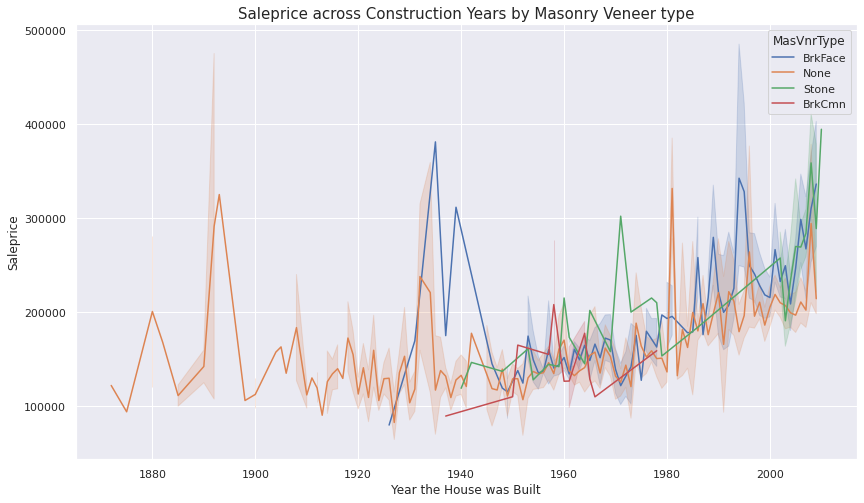

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=train, x= "YearBuilt", y = "SalePrice", hue = "MasVnrType")
plt.title('Saleprice across Construction Years by Masonry Veneer type', fontsize = 15)
plt.xlabel("Year the House was Built", fontsize = 12)
plt.ylabel("Saleprice", fontsize = 12)
plt.show()

There are fluctuations in saleprice of houses across years and as houses that have masonry covered with veneer came in after 1920, as shown in the chart, their saleprices have been slightly higher than those without veneer, however, we see that, generally, saleprice increased for all categories as the years rolled by, and it looks like this is not too dependent on the presence of a Masonry feature covered with veneer, as the price of a house without masonry veneer still continued to increase alongside those that had one, across the years. This information could also be useful for feature selection later when we look at which features significantly impact the saleprice.

In conclusion, the 'None' category corresponds predominantly to no area, with only 5 'None's having areas, and we have seen from the chart above that lack of masonry veneer may not prevent selling or buying a house for an increased price over the years. This further supports our initial assertion that the error may be due to data entry. we will replace the areas for these 'None' rows that recorded MasVnrArea, with 0.

In [ ]:
# Replacing "None" MasVnrType that recorded areas with zero (0)

train.loc[(train.MasVnrArea > 0) & (train.MasVnrType == "None"), "MasVnrArea"] = 0
test.loc[(test.MasVnrArea > 0) & (test.MasVnrType == "None"), "MasVnrArea"] = 0

In [ ]:
# Checking for changes

train[train["MasVnrType"] == "None"][train["MasVnrArea"] > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
test[test["MasVnrType"] == "None"][test["MasVnrArea"] > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [ ]:
# confirming the changes for all the missing values that have been addressed so far

print(train.loc[:, train.isnull().any()].isnull().sum(), "\n")
print(test.loc[:, test.isnull().any()].isnull().sum())

LotFrontage    259
Electrical       1
dtype: int64 

MSZoning         4
LotFrontage    227
Utilities        2
Exterior1st      1
Exterior2nd      1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64


Changes effected!

Now, we'll work on the remaining columns. While there are just 2 columns left with missing values in the train data, the test data still has 8. However, both datasets still have 1 column with missing values in common; `LotFrontage`

From the description file:
* LotFrontage refers to Linear feet of street connected to property

Let's look at the distribution of this column, to help us decide how we fill in the missing values.

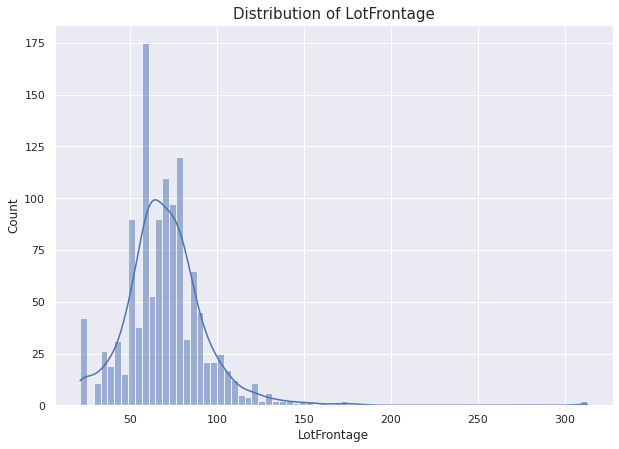

In [ ]:
# Looking at the distribution of `LorFrontage`

plt.figure(figsize=(10, 7))
sns.histplot(data=train, x= "LotFrontage", kde = True)
plt.title("Distribution of LotFrontage", fontsize = 15)
plt.xlabel("LotFrontage", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

The distribution of data in the LotFrontage is rightly-skewed. There are outliers, so we will replace with the median, which is less affected by outliers compared to the mean.

In [ ]:
# Filling in missing values in `LotFrontage` in both train and test data with the mean of the train data.

train["LotFrontage"] = train.LotFrontage.fillna(train.LotFrontage.median())
test["LotFrontage"] = test.LotFrontage.fillna(train.LotFrontage.median())

train.LotFrontage.isna().sum()

0

In [ ]:
test.LotFrontage.isna().sum()

0

In [ ]:
# Columns left with missing values

print(train.loc[:, train.isnull().any()].isnull().sum(), "\n")
print(test.loc[:, test.isnull().any()].isnull().sum())

Electrical    1
dtype: int64 

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64


In the train set, we have one column left, and 7 in the test, all of which are of object type. We will replace missing values here with their modes. However, if the affected column is in the test data, we will fill in with the mode of their corresponding columns from the train dataset.

In [ ]:
# Let's address the only column left in the train dataset first; the ``Electrical` column

train = train.fillna(train.Electrical.value_counts().index[0])

In [ ]:
# We now address the remaining affected columns in the test data, filling missing values with modes from the train data.

for column in test:
    if test[column].isnull().any() == True:
        test[column] = test[column].fillna(train[column].value_counts().index[0])

In [ ]:
print(train.loc[:, train.isnull().any()].isnull().sum(), "\n")
print(test.loc[:, test.isnull().any()].isnull().sum())

Series([], dtype: float64) 

Series([], dtype: float64)


All missing values issues in both train and test data addressed!

Now that we have filled in missing values, let's get a sense of the relationship between numeric predictor variables and our target variable, `SalePrice`

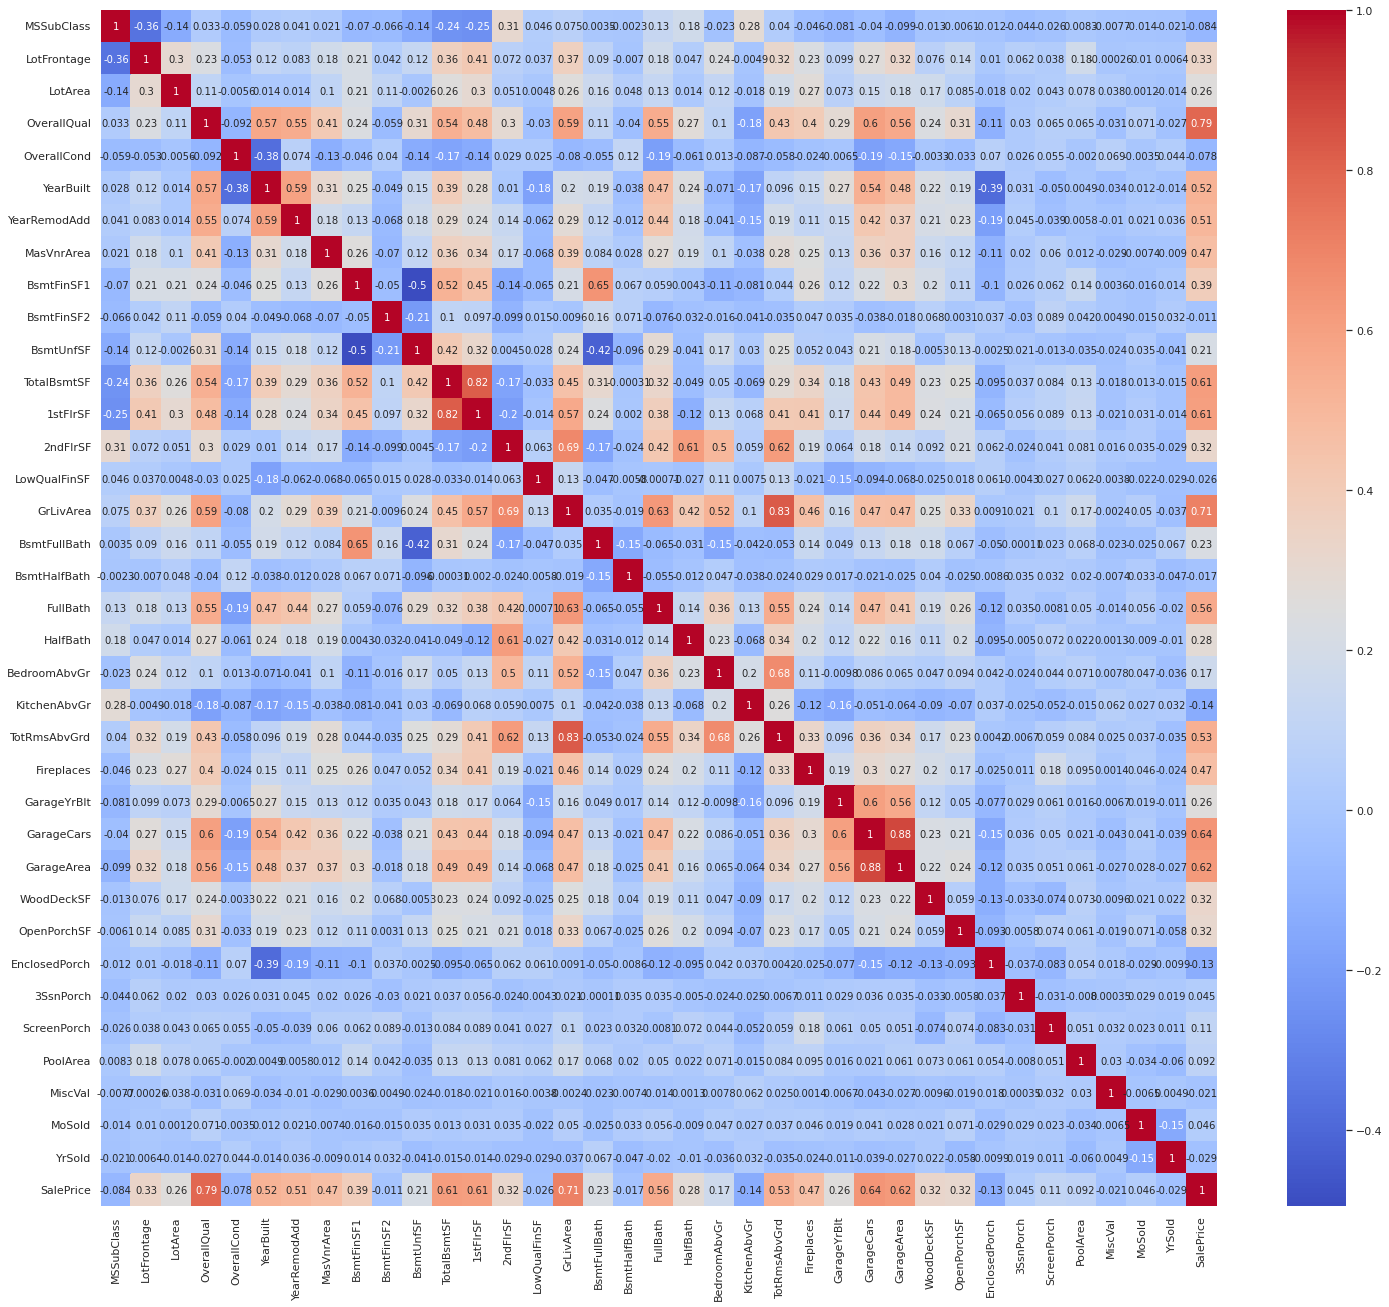

In [ ]:
plt.figure(figsize = (25, 22))
sns.heatmap(train.corr(), cmap = "coolwarm", annot = True)
plt.show()

6 of the columns show stong positive correlation 0.60 or higher, with `SalePrice`. 6 others show moderate corelation 0.40 - 0.59, 10 show weak positive correlation (0.2-0.39, The rest showed very weak to no correlation, of which, 8 were negative.

THe most strongly correlated columns with `SalePrice` are `OveralQual` - overall quality (0.79) and `GrLivArea` - Above grade (ground) living area square feet (0.71)

No surprises, because The better the overal quality of a house, the more expensive the house is likely to be. Also, the more space a house offers above ground level (If a house offers more space above the ground) it is likely to be more expensive.

There are indications of colinearity between columns like `TotalBsmtSF` and `1stFlrSF`, `GrLivArea` and `TotRmsAbvGrd`, as well as, `GarageCars` and `GarageArea`. We could factor this in subsequently should we suspect that this may be impacting the performance of our model, but for now, we will keep all features.

### __Detecting and Addressing Outlier issues__

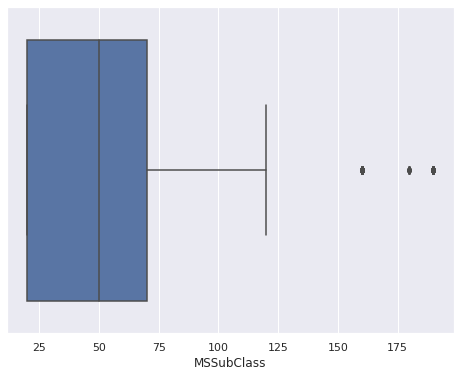

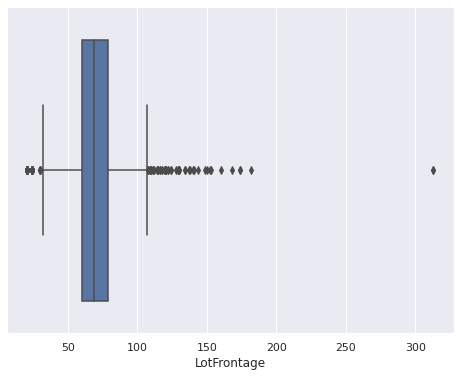

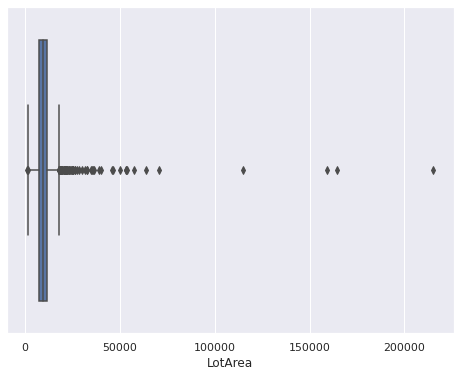

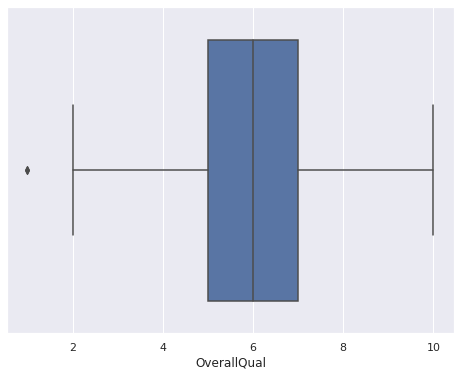

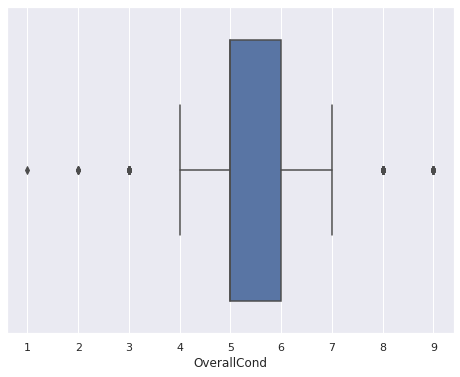

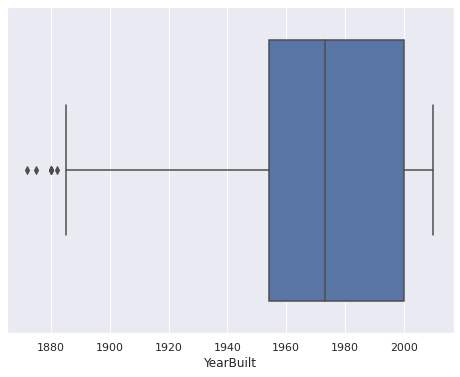

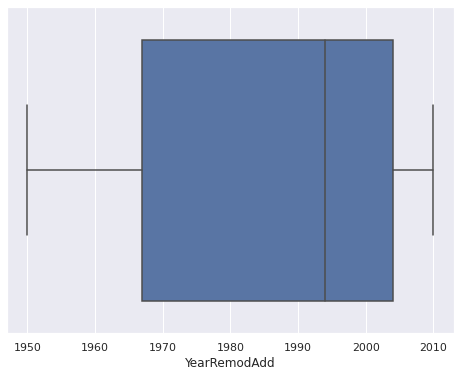

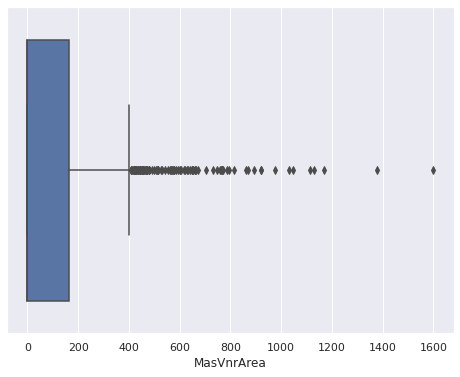

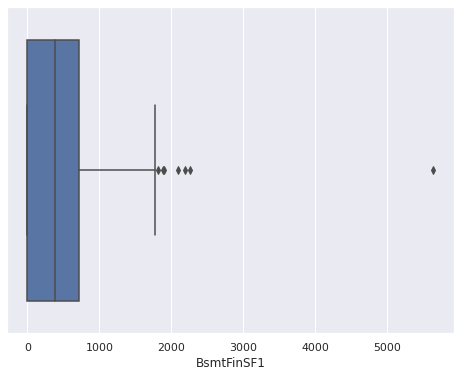

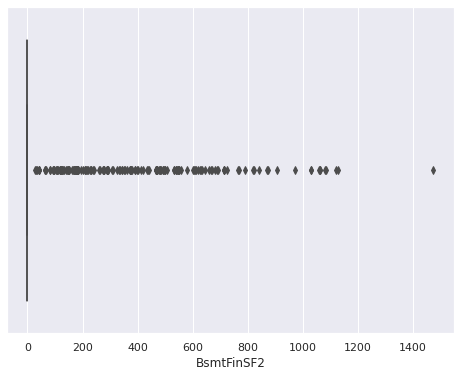

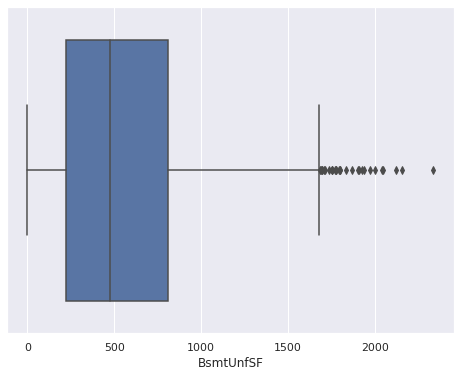

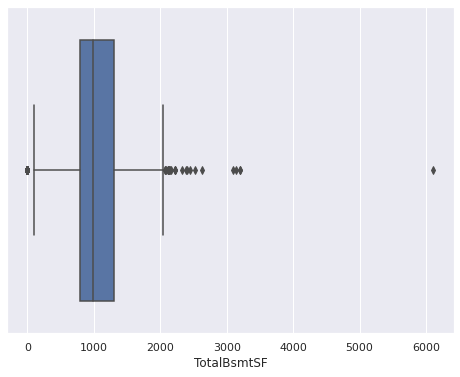

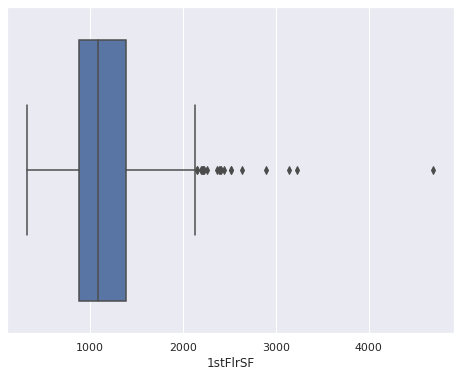

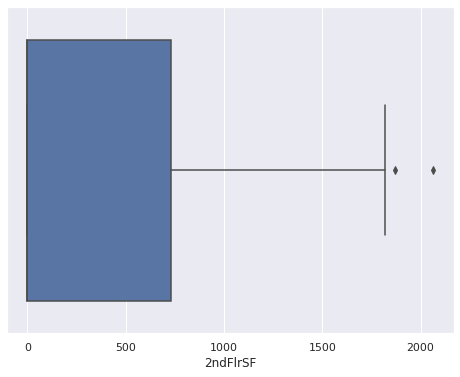

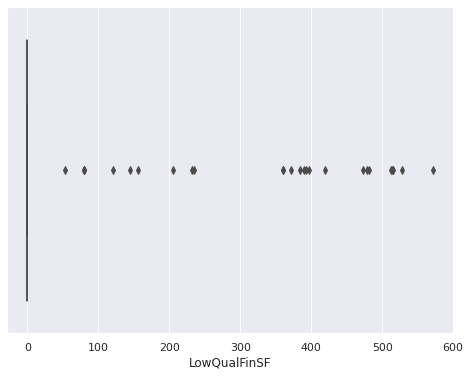

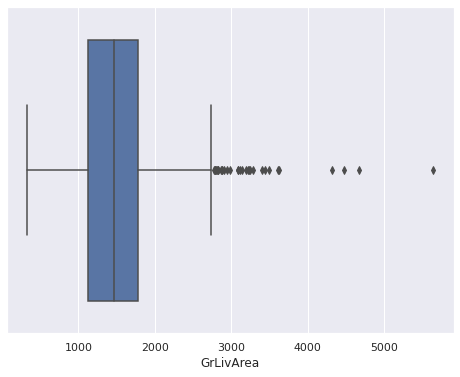

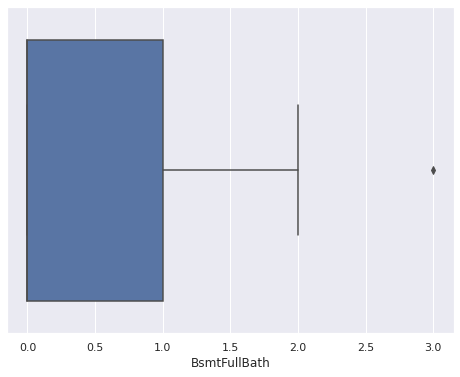

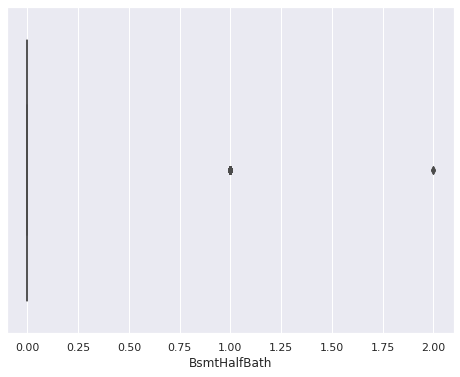

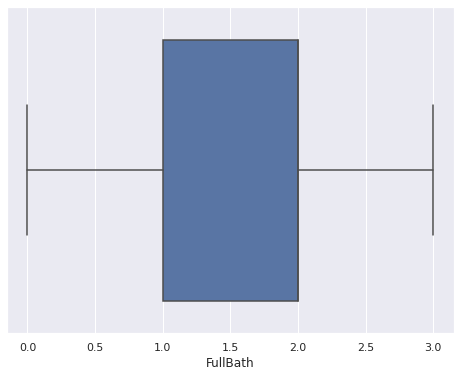

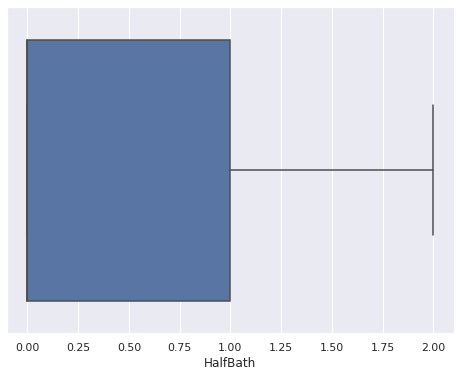

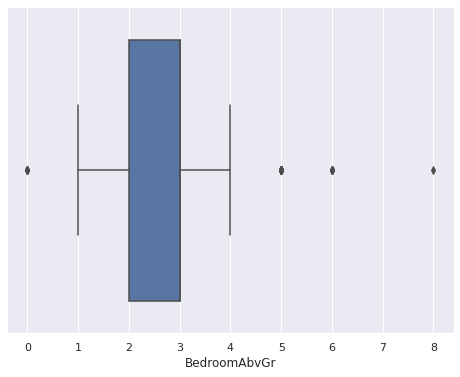

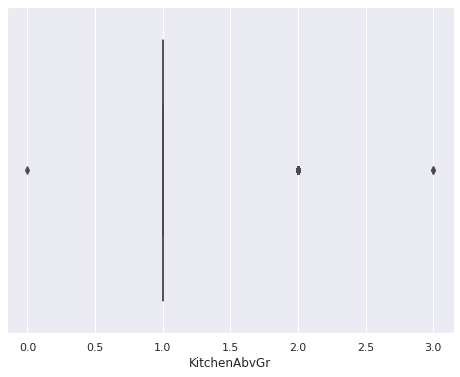

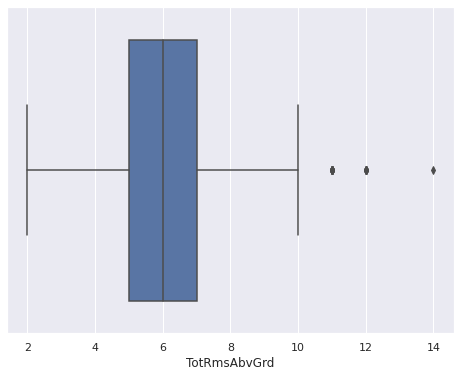

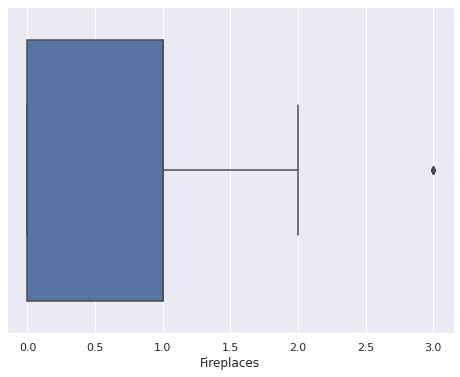

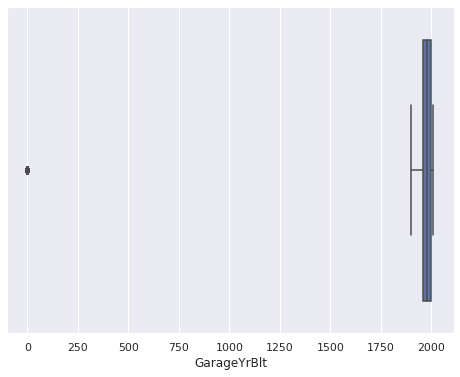

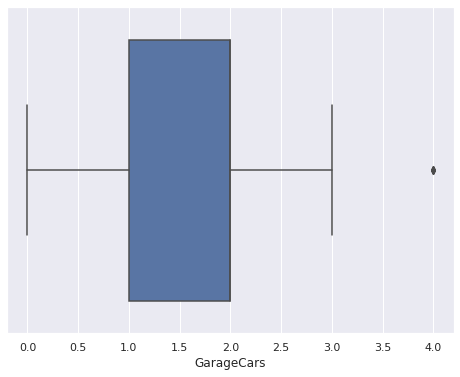

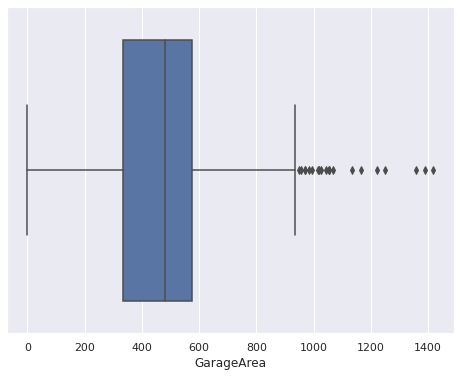

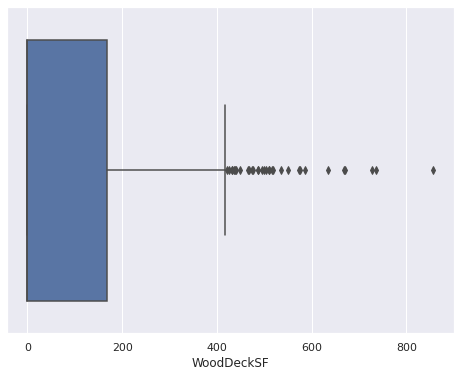

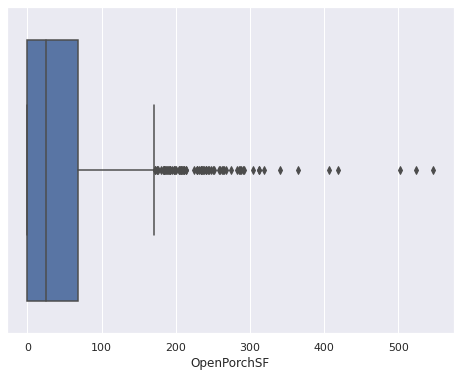

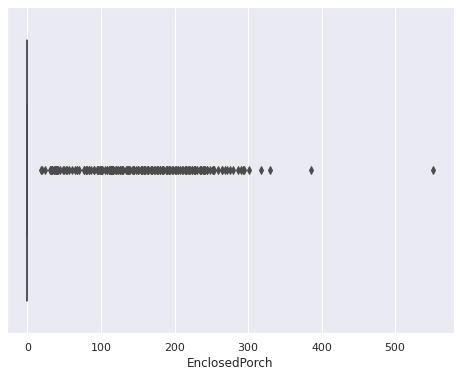

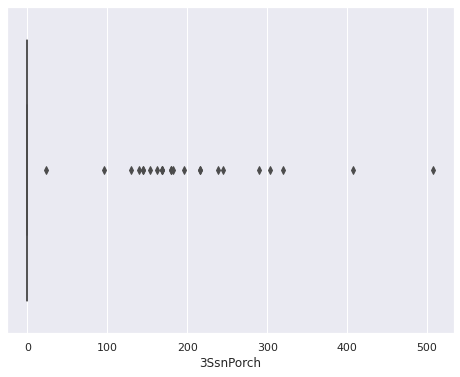

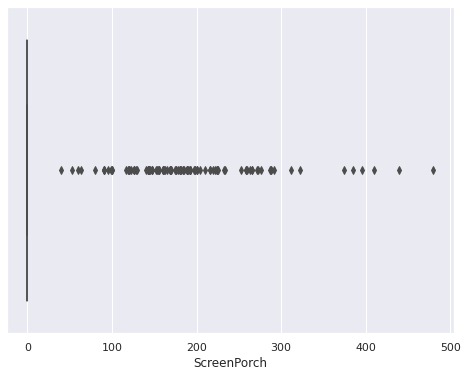

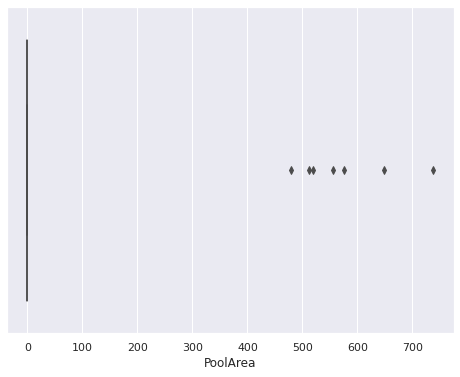

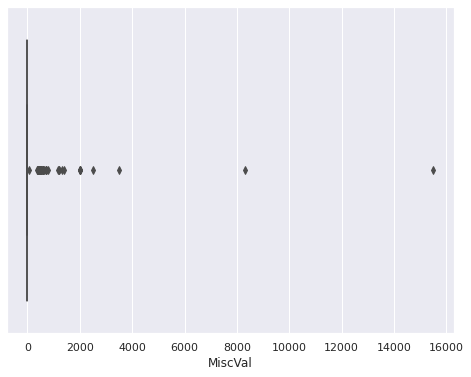

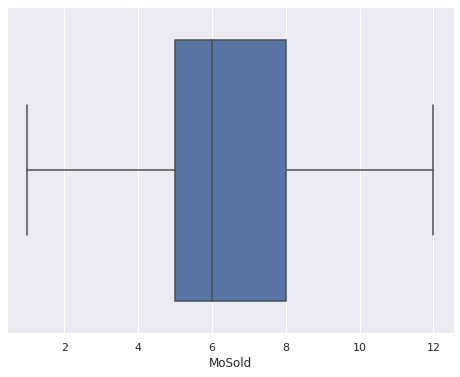

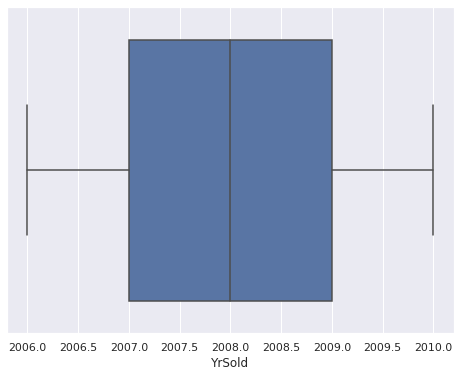

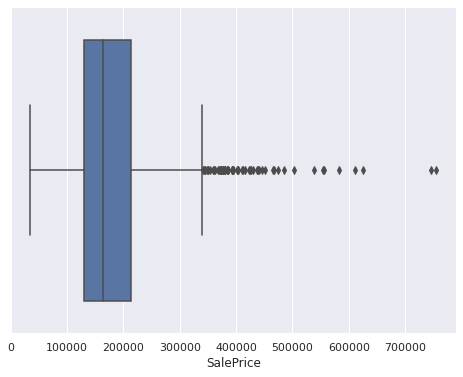

In [ ]:
# Checking the spread of each numeric feature

for col in train:
    if train[col].dtype != "object":
        plt.figure(figsize = (8, 6))
        sns.boxplot(train[col])
        plt.xlabel(col, fontsize = 12)
        plt.show()

A lot of the numeric features in the dataset have outliers. Let's check the total number of numeric features.

In [ ]:
len([col for col in train if train[col].dtype != "object"])

37

There are 37 numeric features in the dataset. We may not be able to remove any row considered an outlier in this dataset as this piece of work is from a competition and, the sample_submission data binds us to submit the same number of rows for the predicted values as is in the test data; 1459 rows, The total number of rows in the train data is just one row more than that in the test; 1460. Removing rows from the train data could mean we will be training our model with less data than we are testing it with, which is not good practice.

However, we will use a combination of guidance from the description file, and some feature examination to decide how to treat some of the outliers in the data.

Columns like `FullBath`(normally distributed), and `HalfBath`(although rightly skewed), show no presence of outliers. The `YearRemodAdd`(Year the house was remodelled), `YrSold` and `Mosold` columns are free of outliers, but these are date-related variables and are not outrightly numeric features. In this light, If we look at the `YearBuilt` column, while its boxplot shows there are outliers, this is a more a case of many more houses being built as the years rolled by than in much earlier years, which could be attributed to global population increase, amongst other factors. So, we do not have to treat such outliers. 

The absence of garages in some houses is the cause of the outliers in the `GarageYrBlt` (Year garage was built) column, as the year-value for houses without garages had to be filled in as zero and, because it is a date-related column, this introduces a huge difference in scale between zero and a typical year value. This absence of garages is also responsible for the skew in `GarageArea` as the zero area-values result in a sharp difference in scale too.

For `GarageCars`, the column contain descrete numeric values showing the number of cars in a garage, and a garage-car count of 4 have been labelled as outlier. One of the reasons may be the absence of garages in some houses. However, let's investigate this column.

In [ ]:
train[train.GarageCars == 4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,90,RM,78.0,7060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309,Unf,0,35,1344,GasA,Ex,Y,SBrkr,1344,0,0,1344,2,0,2,0,2,2,TA,8,Typ,0,None,Attchd,1997.0,Fin,4,784,TA,TA,Y,0,0,0,0,0,0,0,11,2008,WD,Alloca,206300
747,70,RM,65.0,11700,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,0,5,2009,WD,Normal,265979
1190,190,RL,69.0,32463,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,0,3,2007,WD,Normal,168000
1340,20,RL,70.0,8294,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,Y,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,None,Detchd,1974.0,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,0,6,2007,WD,Normal,123000
1350,90,RL,91.0,11643,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,None,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,0,8,2009,WD,Normal,200000


We see that 4 of the 5 houses with 4 garage cars have LotFontage sizes lying at the 50th percentile or more, 3 of the houses have LotArea (size of the house) above the 75th percentile, and 4 of them cost above the 50th percentile for SalePrice. Most of them appear to be big-sized, costly houses with large enough frontage so, it may not be out of place that they have 4 garage cars.

Only one house does not have a kitchen on the floor above the basement (Above grade) and only 2 have 3 kitchens on this floor. It appears the presence of outliers in the `KitchenAbvGr` column is more attributed to most houses having only one kitchen above grade. This means the feature is present at least, once, in most houses. We will leave the column as-is.

For Features like `MasVnrArea`, `WoodDeck`, `OpenPorchSF`, `BsmtFinSF1`, `TotalBsmtSF`, `BsmtUnfSF`, `FirePlaces`, the presence of outliers can be attributed to the significant difference in scale caused by significant number of zero values, which is due to the absence of these features in the houses involved.

Features like the `MSSubClass`, `OverallQual` and `OverallCond` are numerical encodings of categorical variables so, we cannot say that the high-value categories in these columns are outliers. For example, it is possible that, in a rating exercise, more people give a a rating of 1 and only a few give a rating of 5. Such data is likely to be skewed.

In summary, we will leave all of the previously mentioned columns as-is.

Moving on, the boxplots for some of the features catch the eye; like `BsmtFinSF2`, `BsmtHalfBath`, `MiscVal`(Recal we had earlier dropped the Miscelleneous features column which is related to this column), `LowQualFinSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea` (We had earlier dropped the Pool quality feature, related to this column). Upon further examination, almost all the values in these columns are zero (0), indicating that nearly all the houses in the data do not have this features. These columns also show very weak to no relationship with the `SalesPrice`. 

Maybe these two insights are our cue to drop them, so we will drop them.

In [ ]:
cols = ["MiscVal", "BsmtFinSF2", "BsmtHalfBath", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]

train.drop(cols, axis = 1, inplace = True)
test.drop(cols, axis = 1, inplace = True)



We will now examine the outliers in some of the remaining columns. Let's begin with the target variable; `SalePrice`.

In [ ]:
# Looking at the data for sales price from 320,000 above- values above these are labelled as outliers

train[train.SalePrice >= 320000].sort_values("SalePrice", ascending= False).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,989,2444,GasA,Ex,Y,SBrkr,2444,1872,4316,0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,300,2396,GasA,Ex,Y,SBrkr,2411,2065,4476,1,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,7,2007,WD,Abnorml,745000
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,543,1930,GasA,Ex,Y,SBrkr,1831,1796,3627,1,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,7,2006,WD,Normal,625000
898,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,142,2330,GasA,Ex,Y,SBrkr,2364,0,2364,1,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,3,2010,New,Partial,611657
803,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,2822,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,1,2009,New,Partial,582933


Of the 85 houses, most were built between 1990 and 2010 with only about 7 built between 1934 and 1989 and only 2 built in the late 1800s. 


So, these are houses built in the modern era. Also, most have moderate to large lotfrontages between 60 and 174, and lotArea above 10000 square feet, with only 10 below.
 
 In all the houses, all public facilities are present. Only 8 of them have an overallQuality Score less than 8, and recall that, from our correlation plot, overall quality has the strongest relationship with `SalePrice`

A good number of the houses were remodelled and the remodelling was mostly done a year after they were built. A good number also haev Masonry walls covered with Veneer, most have excellent heating quality and kitchen quality. About 62 of the 85 houses have `GrLivArea` (Above grade (ground) living area square feet) between 2000 and 4476, which is above the 75th percentile for the feature, and recall that `GrLivArea` has the second strongest relationship with `SalePrice`

Most have 4 bedrooms above grade, total rooms above grade betwwen 10 and 12. The higest for any house is 14. Most have garages with garage areas large enough to take 3 cars and most were sold either under normal or partial conditions, with partial condition related to new houses, according to the description file.

If we add the fact that house prices, generally, have increased over the years to the above insights, it's safe to say that these houses may not be coincidentally expensive. They do not only have many of the features that could make a house expensive, they were also built in years that reflect the times. We will leave the `SalePrice` column as-is.

From the LotArea boxplot, the distribution of LotArea values is between 0 and 15000 squarefeet. Values above this were considered outliers.

In [ ]:
train[train.LotArea >= 15000].sort_values("LotArea", ascending = False).head()

# train[(train.LotArea >= 15000) & (train.YearBuilt.between(1900, 1999))].shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,80,2136,GasW,TA,Y,SBrkr,2036,0,2036,2,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,6,2009,WD,Normal,375000
335,190,RL,69.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,103,1499,GasA,Ex,Y,SBrkr,1619,167,1786,2,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,8,2008,WD,Normal,228950
249,50,RL,69.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,747,1444,GasA,Gd,Y,SBrkr,1444,700,2144,0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,6,2007,WD,Normal,277000
706,20,RL,69.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,424,1643,GasA,TA,Y,SBrkr,1824,0,1824,1,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,6,2007,WD,Normal,302000
451,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,878,1533,GasA,TA,Y,SBrkr,1533,0,1533,1,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,12,2006,WD,Normal,280000


122 houses have LotArea above 15000. Of these number, 23 were built between the Year 2000 and 2010. Most (96) were built between 1900 and 1999 (Let's bear in mind that, from the dataset, generally, more houses have been built in total in this period than in any other. This also a longer timeframe than 2000-2010). 

Only three were built in the 1800s, and this could be attributed to to the general statistics that less houses were built in earlier years than in later as the population in those times did not reflect the need as it has done in more recent years.

From a number of literatures, like the write-up '[Housing: Then, Now and Future](https://www.moyak.com/papers/house-sizes.html#:~:text=Costs%20in%201900%20were%20about,to%20significantly%20decrease%20in%20size.)', Lotsize of houses have decreased over the years. Let's see if this is so with this dataset.

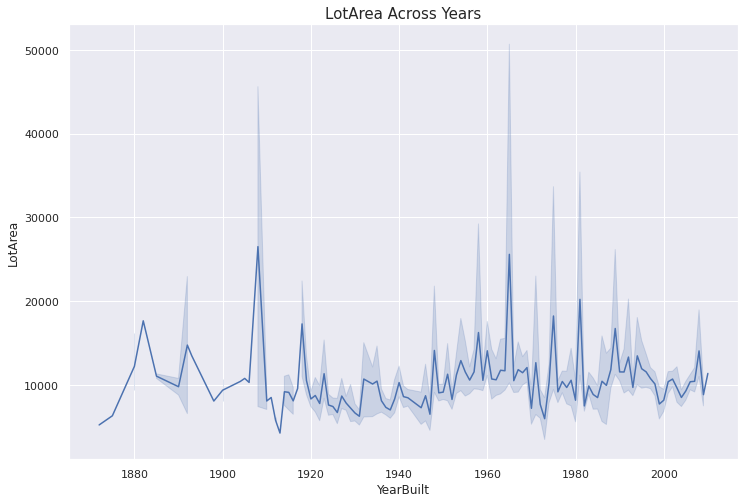

In [ ]:
plt.figure(figsize= (12, 8))
sns.lineplot(data=train, x = "YearBuilt", y = "LotArea")
plt.title("LotArea Across Years", fontsize = 15)
plt.show()

The chart shows frequent fluctuations in Lot areas. However, it does not clearly show that there has been a decrease in size as the years rolled by. 

The house with the highest LotArea (215245 square feet) in the dataset was built in 1965, so the year of construction falls within the period when most of the houses with large Lotsizes where built, as observed in our dataset and chart.

The price of the house also lies above the 75th percentile, and almost $400,000. Generally, although this price may be considered low for such huge Lotsize, It is not too cheap either. 

There may be other explanations for this huge lotsize that we may not be privy to. So, while we suspect that this LotArea value may be due to an error in data entry, we do not have enough domain or stakeholder information to support our suspicion. We will leave this LotArea value as-is.

Lastly, we will look at the LotFontage column. The distribution of the column is between 30 and 105 linear feat.

In [ ]:
train[train.LotFrontage > 105].sort_values("LotFrontage", ascending = False).head()

# train[(train.LotFrontage > 105) & (train.YearBuilt > 1950)].sort_values("LotFrontage", ascending = False).shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,466,6110,GasA,Ex,Y,SBrkr,4692,950,5642,2,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,1,2008,New,Partial,160000
934,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,160,585,GasA,Ex,Y,SBrkr,2069,0,2069,1,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,11,2008,WD,Normal,242000
1127,20,RL,182.0,14572,Pave,IR3,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300,Unf,230,1530,GasA,Ex,Y,SBrkr,1530,0,1530,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,3,630,TA,TA,Y,144,36,11,2007,WD,Family,259000
197,75,RL,174.0,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,140,1360,GasA,Gd,Y,SBrkr,1360,1360,3112,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,3,2006,WD,Abnorml,235000
231,60,RL,174.0,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,689,Unf,773,1462,GasA,Ex,Y,SBrkr,1490,1304,2794,1,2,1,4,1,Ex,9,Typ,1,TA,Attchd,1995.0,Fin,3,810,TA,TA,Y,0,146,7,2009,WD,Normal,403000


We will also leave the most outlying values in the LotFrontage as-is. This is because the two buildings with the highest lot frontage show contrasting features so, we are not sure whose LotFrontage value is right or wrong.

The most correlated feature with the LotFrontage is the `1stFlrSF` (first floor square feet), followed by the total basement square feet and above-grade living areaa. The first building is 2storey, with Above-grade living area, first floor square feet, total basement square feet, all close to the 100th percentile. It also has more total rooms above grade. The other is a 1storey building with very much lower above-grade living area, first floor square feet and total basement square feet. Their garage areas are also far apart, even though both hold the same number of cars.

Let's compare the average LotFrontage for 1storey and 2storey houses and see if we will find something.

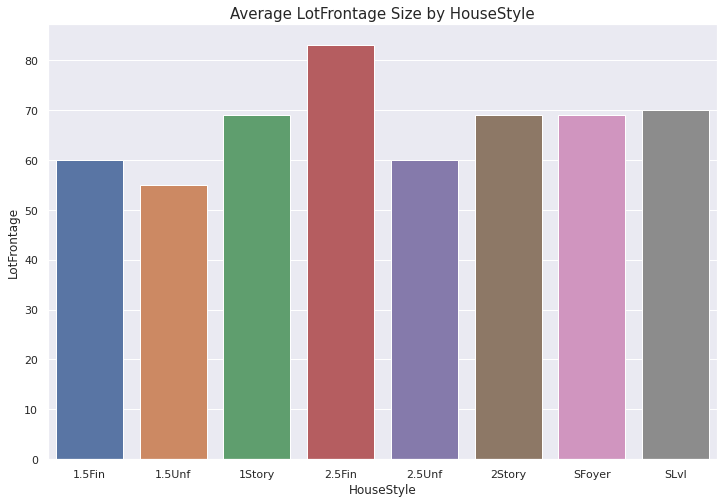

In [ ]:
plt.figure(figsize= (12, 8)) # Using the median as average because the distribution is skewed
sns.barplot(data = train.groupby("HouseStyle")["LotFrontage"].median().reset_index(), x = "HouseStyle", y = "LotFrontage")
plt.title("Average LotFrontage Size by HouseStyle", fontsize = 15)
plt.show()

There is no noticable difference in LotFrontage size between 1storey and 2storey buildings. Nearly the same result is also obtained with the mean. This appears to support the likeliood that the two house can have the same LotFrontage size, even though we suspect that this is more due to data entry error.

Essentially, we do not have sufficient domain or stakeholder information to confirm or debunk our suspicion. Hence our decision to leave the values as-is

### __Exploratory Data Analysis(EDA)__ 


Please, find the [EDA for this work here](https://drive.google.com/file/d/1eUnU9eMv5vfmgx1-MjFHREy9dbwbRWSk/view?usp=sharing)

### __Data Transformation__

In this section, we will combine some columns, also create new, calculated columns from existing ones, all in order to reduce redundancy and extract more meaningful information from the data.

In [ ]:
# Creating new column showing duration between year the house was built and year the house was sold. 

train["Built_Sold_duration"] = train["YrSold"] - train["YearBuilt"]
test["Built_Sold_duration"] = test["YrSold"] - test["YearBuilt"]

# Duration between Year house was remodeled and sold

train["Remodelled_Sold_duration"] = train["YrSold"] - train["YearRemodAdd"]
test["Remodelled_Sold_duration"] = test["YrSold"] - test["YearRemodAdd"]

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Built_Sold_duration,Remodelled_Sold_duration
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500,7,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000,91,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000,8,8


In [ ]:
# Combining Condition1 and Condition two columns for more meaningful insight.

train["Conditions"] = train.Condition1 + train.Condition2     # Proximity to various conditions (if more than one is present)
test["Conditions"] = test.Condition1 + test.Condition2

# Combining ExteriorIst and Exterior2nd two columns for more meaningful insight.

train["ExteriorCovering"] = train.Exterior1st + train.Exterior2nd   # Exterior covering on house (if more than one material)
test["ExteriorCovering"] = test.Exterior1st + test.Exterior2nd      

In [ ]:
# Dropping the condition1 ans Condition2 columns

train.drop(["Condition1", "Condition2"], axis = 1, inplace = True)
test.drop(["Condition1", "Condition2"], axis = 1, inplace = True)

# Dropping the Exterior1st and Exterior2nd columns

train.drop(["Exterior1st", "Exterior2nd"], axis = 1, inplace = True)
test.drop(["Exterior1st", "Exterior2nd"], axis = 1, inplace = True)

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Built_Sold_duration,Remodelled_Sold_duration,Conditions,ExteriorCovering
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500,5,5,NormNorm,VinylSdVinylSd
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500,31,31,FeedrNorm,MetalSdMetalSd
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500,7,6,NormNorm,VinylSdVinylSd
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000,91,36,NormNorm,Wd SdngWd Shng
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000,8,8,NormNorm,VinylSdVinylSd


### __Feature Encoding__

There are a lot of columns in this dataset. To be able to encode in one breath, we will encode all the categorical variables with the one-hot-encoding method for now, see how the model performs, then we can make adjustmemts as required.

In [ ]:
# First, creating a copy each of train and test, just incese

train2 = train.copy()
test2 = test.copy()

In [ ]:
# Let's convert string columns to category. 

str_cols = [col for col in train if train[col].dtype == "object"]

In [ ]:
train2[str_cols] = train2[str_cols].astype("category")
test2[str_cols] = test2[str_cols].astype("category")

In [ ]:
# Dropping the `SalePrice` column before Onehot encoding

train_frac = train2.drop("SalePrice", axis = 1)

# Converting categorical columns to numeric column using OneHotEncoding

train3 = pd.get_dummies(train_frac)
test3 = pd.get_dummies(test2)

In [ ]:
print(train3.shape, test3.shape, "\n")

(1460, 316) (1459, 293) 



In [ ]:
# The train and test data have different number of columns. 
# Using the align function to make them the same. Although this may lead to loss of some columns.

train3, test3 = train3.align(test3, join='inner', axis=1)

In [ ]:
print(train3.shape, "\n", test3.shape)

(1460, 270) 
 (1459, 270)


### __Feature Scaling__

In [ ]:
# Scaling both datasets using the MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
train3 = scaler.fit_transform(train3)
test3 = scaler.transform(test3)

In [ ]:
# renaming the train and test data conventionally 

X_train, y_train, X_test = train3, train2.SalePrice, test3 

### __Building the Model.__

The task at hand, Predicting house prices, is a regression problem. 

Let's build a baseline model first, using different regression algorithms, but without doing any cross validation or tuning hyperparameters at this point.

Regardless of which one performs best on training data, we will save the predictions for each model in a csv file for submission so we can get to see which of these models generalize better on previously unseen data.

In [ ]:
# Instantiating the models

lr_model = linear_model.LinearRegression()
Ls_model = linear_model.Lasso(random_state=42)
rf_model = RandomForestRegressor(random_state= 42)
xgb_model = XGBRegressor(random_state = 42)
ad_model = AdaBoostRegressor(random_state= 42)
kn_model = KNeighborsRegressor()

In [ ]:
models = {"Linearregression_model": lr_model, 
          "Lasso_model": Ls_model, 
          "RandomForest_model": rf_model, 
          "Xgboost_model": xgb_model,
          "Adaboost_model": ad_model, 
          "KNN_model": kn_model}

for name, model in models.items():
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"The training score for {name} is {train_score}, \n")
  sub_dict  = {'Id' : df_test['Id'], 'SalePrice' : y_pred}
  prediction_dfs = pd.DataFrame(data = sub_dict)
  prediction_dfs.to_csv(f"Baseline_submission_{name}.csv", index = False) 

RandomForest records the highest performance (R2_score) on training data but how well a model performs on unseen data is what is more important.

From the submissions made on Kaggle, of all the models, Xgboost performed best on test data. 

The RMSE obtained (as at baseline submission) for each of the models are shown below (** note that the decision to not replace outlying values was made after baseline submission but the impact of this on the RMSE was found negligible, hence not shown):

* Xgboost- 0.13754
* RandomForest- 0.14594
* KNN: 0.20159
* Lasso: 0.2107
* Adaboost: 0.21623
* Linear regression- 1.15755

The baseline results show that the model from Xgboost performed best on unseen data.

#### Cross Validation

The results from our baseline models, especially for Xgboost and random forest, are fair enough. However, it is important to make our model more robust towards unseen data. We can do this through cross validation and getting the best hyperparameters. We need to change the splitting method into one in which the data is split into a number of folds, k (Kfolds) rather than just train and test. From this, we can obtain a number of models equal to k from each of our regressors. We could choose to aggregate the models that emerged from each algorithm. We can then compare and see which of the algorithms produced a combined model that performed best on unseen data.

In [ ]:
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, cv=10)
  print(f"the mean score for {name} is: {np.mean(scores)}, \n")

the mean score for Linearregression_model is: -1.1125712016321454e+22, 

the mean score for Lasso_model is: 0.8118695991286715, 

the mean score for RandomForest_model is: 0.863813355806166, 

[12:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:33] WARNING: /workspace/src/objective/

From the cross-validation result, mean score for the Xgboost model is the highest, followed by RandomForest.

### __Getting the best hyperparameters__

We will also combine cross validation with grid search to get the hyperparameters that yield the best performing model.

We will focus on the models from Xgboost and Randomforest and we will try to get the hyperparameters that will help us create a model that gives the best performance.

Let's start with random forest.

PS: We had to settle for randomised gridsearch because full gridsearch could not execute on the device being used).

In [ ]:
# Using RandomizedGridSearchCV to get the best hyperparameters
#For random forest

# Specifying the parameters to perform random search on.

rforest_params = {'n_estimators': [200, 400, 600, 800, 1000],
                  'max_depth': [None, 10, 20, 30, 40, 50],
                  'min_samples_split': [6, 8, 10, 12],
                  'min_samples_leaf': [3, 4, 5],
                  'max_features': ['sqrt'],
                  'bootstrap': [True, False]}

# The sample hyperparameters below were taking excessive time to execute both with GridSearch and RandomizedGridSearch.
#rforest_params = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                  #"criterion": ["squared_error", "absolute_error"],
                  #'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  #'min_samples_split': [2, 4, 6, 8, 10, 12],
                  #'min_samples_leaf': [1, 2, 3, 4, 5],
                  #'max_features': ['auto', 'sqrt'],
                  #'bootstrap': [True, False]}

# Instantiating RandomizedSearchCV with the trial parameters for random forest

rfrandom_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = rforest_params, n_iter = 100, cv = 10, random_state=42)

In [ ]:
# Fitting the randomizedsearch model to the train data

rf_model_result = rfrandom_grid.fit(X_train, y_train)

# Getting the best score based on the best parameters

best_score, best_params = rf_model_result.best_score_, rf_model_result.best_params_
print(f"Best score: {best_score} was obtained with these parameters: {best_params}")

# Getting the model with the best estimator

best_model = rf_model_result.best_estimator_

# Using the best model to make predictions with the test data

new_pred = best_model.predict(X_test)

Best score: 0.8552939524863742 was obtained with these parameters: {'n_estimators': 800, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [ ]:
# Collecting the optimized predictions in a csv file for submission

submission_dict  = {'Id' : df_test['Id'], 'SalePrice' : new_pred}
new_pred_df = pd.DataFrame(data = submission_dict)
new_pred_df.to_csv(f"rf_optimized_submission_.csv", index = False)

In [ ]:
# Previewing the submission csv.

submission = pd.read_csv("rf_optimized_submission_.csv")

In [ ]:
submission.head()

,Id,SalePrice
0,1461,125323.125773
1,1462,151138.717060
2,1463,183938.579297
3,1464,193275.037135
4,1465,193301.112644


Our error rate from the optimised random forest model after hyperparameter tuning increased from what we had with our baseline model (image at the top of this notebook), which is not what we want. However, we got a better RMSE with 10-fold split compared to 5-fold.

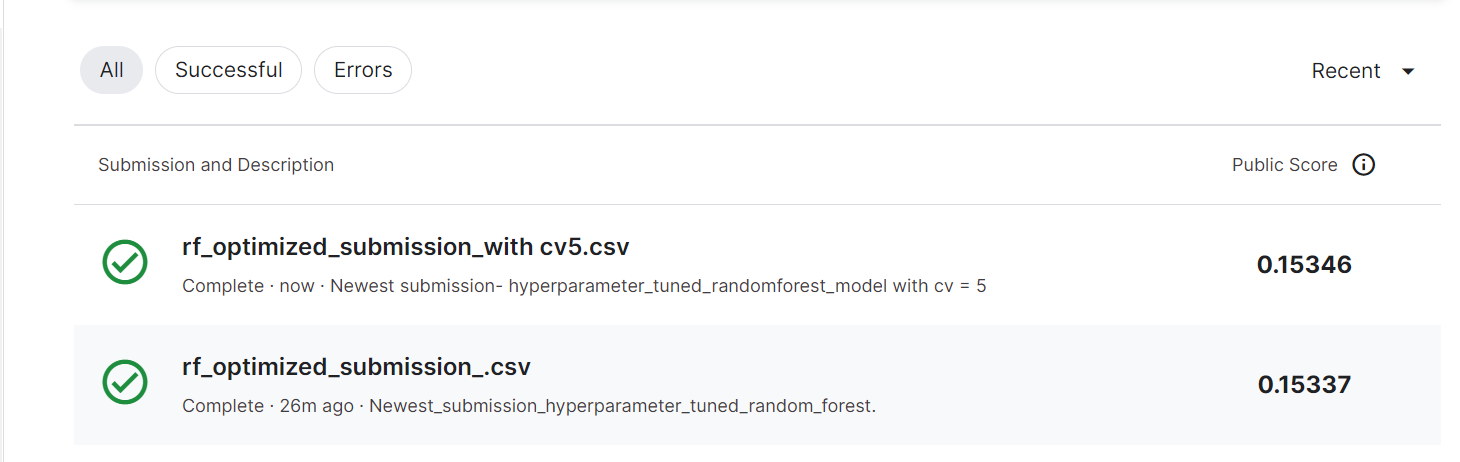




To investigate and address this issue, the following are adjustments we can make subsequently.

* Repeat the randomized gridsearch with more sample hyperparameters, as we were unable to perform full gridsearch due to computational power and time.

* Implement hyperparameter-tuning for the Xgboost model and see if it performs better.

* **Revisit data transformation**- Reclassify some columns: like the Neighbourhood column which is highly multiclass, and it is not ordinal. With one-hot encoding, it adds several extra columns to our data. We can reduce the number of classes we need to encode if we reclassify the column. Using a feature like the Saleprice, we can create a new ordinal column from this.

* **Improve the feature encoding process**- Instead of one-hot-encoding for all categorical variables, use a combination of Label and one-hot encoding; Label encoding for ordinal categorical variables and retain one-hot for norminal categorical variables.

* **Find an improved solution to the mis-alignment problem** in the feature scaling section. The current solution with the align() function results in loss of some columns, of which we are not sure if key columns are affected.

* **Dimensionality reduction**- Utilize the result from the correlation plot to drop features that show very weak to no relationship with the target variable or, possibly deploy other means to achieve this.

* Factor in colinearity as observed through the correlation plot.

* etc.

Thank you.

### __Dataset Description__

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
